# Step 1 - Data Preparation

This will prepare data for training and testing. 

*References*
- https://www.kaggle.com/code/nareshbhat/starter-guide-to-build-nlp-ml-model-in-pycaret/notebook

In [70]:
import pandas as pd
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## 1.1 Import and Explore

In [71]:
df = pd.read_csv("data/news_headlines.csv")
print(df.shape)
df.head()

(50878, 2)


,category,headline
0,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...
1,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57
2,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...
3,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...
4,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...


In [72]:
df_groupby = df.groupby("category").count().sort_values(by="headline", ascending=False).reset_index()
df_groupby

,category,headline
0,POLITICS,32738
1,ENTERTAINMENT,16058
2,TECH,2082


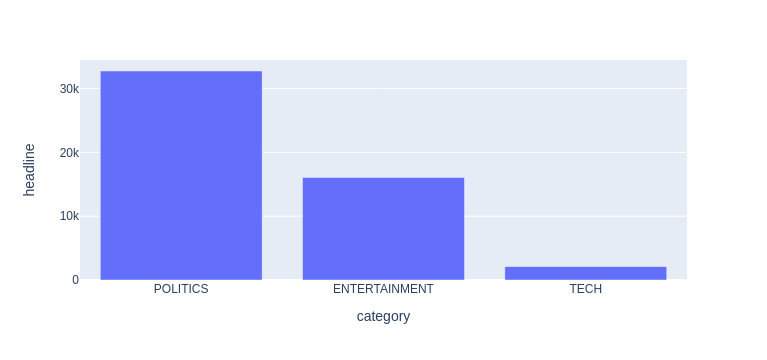

In [73]:
fig = px.bar(df_groupby, x="category", y="headline")
fig.show()

## 1.2 Reserve a small portion of data for testing 

In [74]:
df_test = df.groupby('category', group_keys=False).apply(lambda x: x.sample(frac=0.001, random_state=123))
print(df_test.shape)
df_test.head(5)

(51, 2)


,category,headline
25853,ENTERTAINMENT,Tom Hanks Soars In First Trailer For Clint Eas...
8440,ENTERTAINMENT,Does Hollywood Have A Bias Against Films Portr...
27009,ENTERTAINMENT,Johnny Depp Doesn’t Want His ‘Short Marriage’ ...
43459,ENTERTAINMENT,Steven Lee Olsen: Nashville's Next Big Thing?
48145,ENTERTAINMENT,"Happy Birthday, Jack! Words of Wisdom from Ame..."


In [75]:
df_remaining = df.drop(df_test.index)
print(df_remaining.shape)

(50827, 2)


In [76]:
df_test_groupby = df_test.groupby("category").count().sort_values(by="headline", ascending=False).reset_index()
df_test_groupby

,category,headline
0,POLITICS,33
1,ENTERTAINMENT,16
2,TECH,2


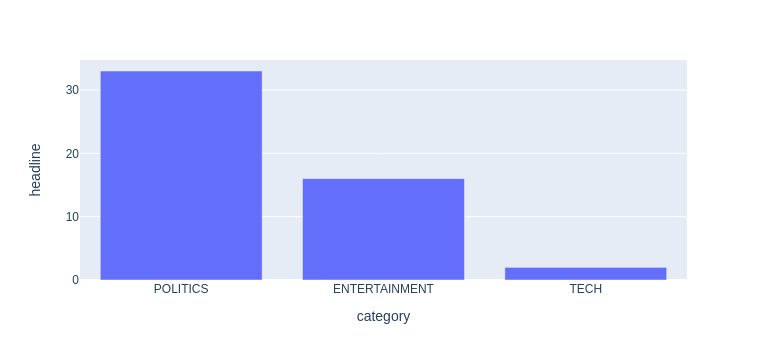

In [77]:
fig = px.bar(df_test_groupby, x="category", y="headline")
fig.show()

In [78]:
# reset index before saving the test data

df_test = df_test.reset_index(drop=True)
df_test.head()

,category,headline
0,ENTERTAINMENT,Tom Hanks Soars In First Trailer For Clint Eas...
1,ENTERTAINMENT,Does Hollywood Have A Bias Against Films Portr...
2,ENTERTAINMENT,Johnny Depp Doesn’t Want His ‘Short Marriage’ ...
3,ENTERTAINMENT,Steven Lee Olsen: Nashville's Next Big Thing?
4,ENTERTAINMENT,"Happy Birthday, Jack! Words of Wisdom from Ame..."


In [79]:
df_test.to_csv("data/test.csv", index=False)

## 1.3 Prepare a stratified sample for learning

In [80]:
df_train = df_remaining.groupby('category', group_keys=False).apply(lambda x: x.sample(frac=0.02, random_state=123))
print(df_train.shape)
df_train.head(5)

(1017, 2)


,category,headline
19730,ENTERTAINMENT,Why I'm Still #TeamLogan Even After The 'Gilmo...
50344,ENTERTAINMENT,'The Shining' Prequel: Stanley Kubrick's Steph...
39215,ENTERTAINMENT,Victoria Justice: 'There's No Feuding Going On...
3889,ENTERTAINMENT,Tom Cruise Shares Frightening Slow Motion Vide...
30836,ENTERTAINMENT,Feast Your Eyes On This Beautiful 'Office' Reu...


In [81]:
df_train_groupby = df_train.groupby("category").count().sort_values(by="headline", ascending=False).reset_index()
df_train_groupby

,category,headline
0,POLITICS,654
1,ENTERTAINMENT,321
2,TECH,42


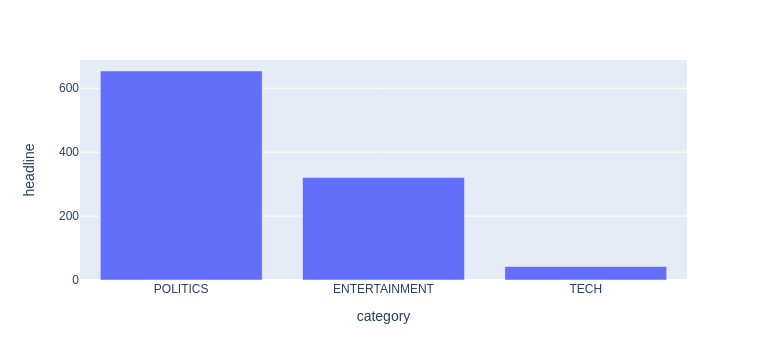

In [82]:
fig = px.bar(df_train_groupby, x="category", y="headline")
fig.show()

In [83]:
# reset index before saving the test data

df_train = df_train.reset_index(drop=True)
df_train.head()

,category,headline
0,ENTERTAINMENT,Why I'm Still #TeamLogan Even After The 'Gilmo...
1,ENTERTAINMENT,'The Shining' Prequel: Stanley Kubrick's Steph...
2,ENTERTAINMENT,Victoria Justice: 'There's No Feuding Going On...
3,ENTERTAINMENT,Tom Cruise Shares Frightening Slow Motion Vide...
4,ENTERTAINMENT,Feast Your Eyes On This Beautiful 'Office' Reu...


In [84]:
df_train.to_csv("data/train.csv", index=False)

## The End.